<a href="https://colab.research.google.com/github/uelkariuki/Data_science/blob/master/uel_kariuki_linear_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Name: Uel Kariuki
Date: 26/6/2025

The task involves building a regression model using python
This involves exploring a dataset, training, testing the model
and visualizing the results.

'''

'\nName: Uel Kariuki\nDate: 26/6/2025\n\nThe task involves building a regression model using python\nThis involves exploring a dataset, training, testing the model\nand visualizing the results.\n\n'

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Simple Linear Regression

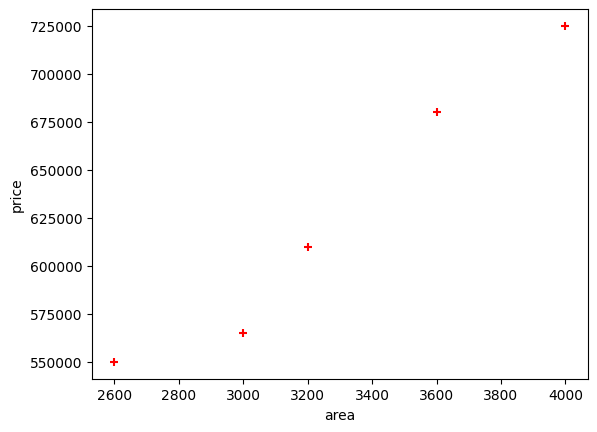

In [ ]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')

In [ ]:
xvaluesdf = df.drop('price',axis='columns')
xvaluesdf

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [ ]:
yvaluesdf = df.price
yvaluesdf

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [ ]:
# create linear regression model object
reg = linear_model.LinearRegression()
reg.fit(xvaluesdf.values, yvaluesdf.values)

LinearRegression()

In [ ]:
reg.predict([[3300]])

array([628715.75342466])

Equation Y = m * X + b (m is coefficient and b is intercept)

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

np.float64(180616.43835616432)

Predict the price of a house with 5000 sq feet

In [ ]:
y = 5000*135.78767123 + 180616.43835616432
y

859554.7945061643

In [ ]:
reg.predict([[5000]])

array([859554.79452055])

Input file with area only and generate prediction file

In [ ]:
area_df = pd.read_csv("areas.csv")
area_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [ ]:
prices_df = reg.predict(area_df.values)
prices_df

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

Combine to one dataframe

In [ ]:
area_df['prices'] = prices_df
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
area_df.to_csv('prediction.csv')

Multi-variate Linear Regression

In [ ]:
dfm = pd.read_csv('homeprices-m.csv')
dfm

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


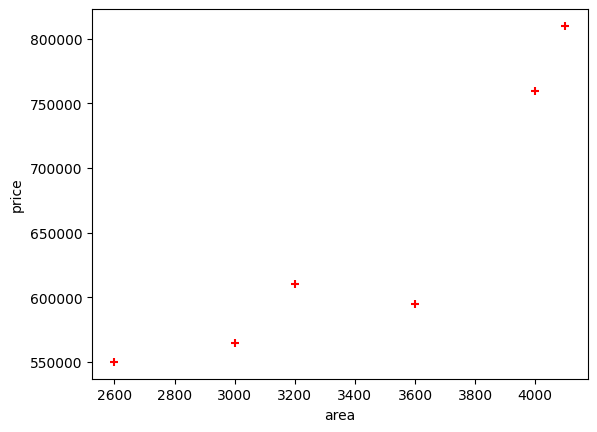

In [ ]:
# scatter plot for area vs price multi variate linear regression
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(dfm.area, dfm.price, color='red', marker='+')

In [ ]:
dfm.bedrooms.median()

4.0

In [ ]:
dfm.bedrooms = dfm.bedrooms.fillna(dfm.bedrooms.median())
dfm

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
xvaluesdfm = dfm.drop('price', axis='columns')
xvaluesdfm

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [ ]:
yvaluesdfm = dfm.price
yvaluesdfm

,price
0,550000
1,565000
2,610000
3,595000
4,760000
5,810000


In [ ]:
mreg = linear_model.LinearRegression()
mreg.fit(xvaluesdfm.values, yvaluesdfm.values)

LinearRegression()

In [ ]:
mreg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
mreg.intercept_

np.float64(221323.00186540396)

Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [ ]:
112.06244194*3000 +  23388.88007794*3 + -3231.71790863*40 + 221323.00186540396

498408.251574024

In [ ]:
mreg.predict([[3000, 3, 40]])

array([498408.25158031])

Evaluating Simple Regression Model

In [ ]:
# splitting the data into training and testing sets
x_simple_train, x_simple_test, y_simple_train, y_simple_test = train_test_split(
    xvaluesdf, yvaluesdf, test_size=0.4, random_state=42)

In [ ]:
# Refit the simple model on the training data
reg_split = linear_model.LinearRegression()
reg_split.fit(x_simple_train.values, y_simple_train.values)

LinearRegression()

In [ ]:
# making predictions on the test set
y_simple_pred = reg_split.predict(x_simple_test.values)

In [ ]:
# Calculate evaluation metrics
# Mean Absolute Error
MAE_simple = mean_absolute_error(y_simple_test, y_simple_pred)
print(f"Simple Model's Mean Absolute Error(MAE): {MAE_simple}")


Simple Model's Mean Absolute Error(MAE): 16184.210526315845


In [ ]:
# Mean Squared Error
MSE_simple = mean_squared_error(y_simple_test, y_simple_pred)
print(f"Simple Model's Mean Squared Error(MSE): {MSE_simple}")



Simple Model's Mean Squared Error(MSE): 490893351.800556


In [ ]:
# Root Mean Squared Error
RMSE_simple = np.sqrt(MSE_simple)
print(f"Simple Model's Root Mean Squared Error(RMSE): {RMSE_simple}")


Simple Model's Root Mean Squared Error(RMSE): 22156.113192537992


In [ ]:
# R-Squared(R^2 Score)
R2_simple = r2_score(y_simple_test, y_simple_pred)
print(f"Simple Model's R-squared (R^2 Score): {R2_simple}")


Simple Model's R-squared (R^2 Score): 0.9232979137811631


Evaluating Multi-variate Linear Regression Model

In [ ]:
# splitting the data into training and testing sets for multi variate model
x_multi_train, x_multi_test, y_multi_train, y_multi_test = train_test_split(
    xvaluesdfm, yvaluesdfm, test_size=0.4, random_state=42)

In [ ]:
# Refit the multi variate model on the training data
mreg_split = linear_model.LinearRegression()
mreg_split.fit(x_multi_train.values, y_multi_train.values)

LinearRegression()

In [ ]:
# making predictions on the test set
y_multi_pred = mreg_split.predict(x_multi_test.values)

In [ ]:
# Calculate evaluation metrics
# Mean Absolute Error
MAE_multi = mean_absolute_error(y_multi_test, y_multi_pred)
print(f"Multi Model's Mean Absolute Error(MAE): {MAE_multi}")

Multi Model's Mean Absolute Error(MAE): 32547.565091969253


In [ ]:
# Mean Squared Error
MSE_multi = mean_squared_error(y_multi_test, y_multi_pred)
print(f"Multi Model's Mean Squared Error(MSE): {MSE_multi}")


Multi Model's Mean Squared Error(MSE): 1098414505.426562


In [ ]:
# Root Mean Squared Error
RMSE_multi = np.sqrt(MSE_multi)
print(f"Multi Model's Root Mean Squared Error(RMSE): {RMSE_multi}")


Multi Model's Root Mean Squared Error(RMSE): 33142.337054386524


In [ ]:
# R-Squared(R^2 Score)
R2_multi = r2_score(y_multi_test, y_multi_pred)
print(f"Multi Model's R-squared (R^2 Score): {R2_multi}")


Multi Model's R-squared (R^2 Score): 0.9226771173340708


Visualizing Simple Linear Regression Results

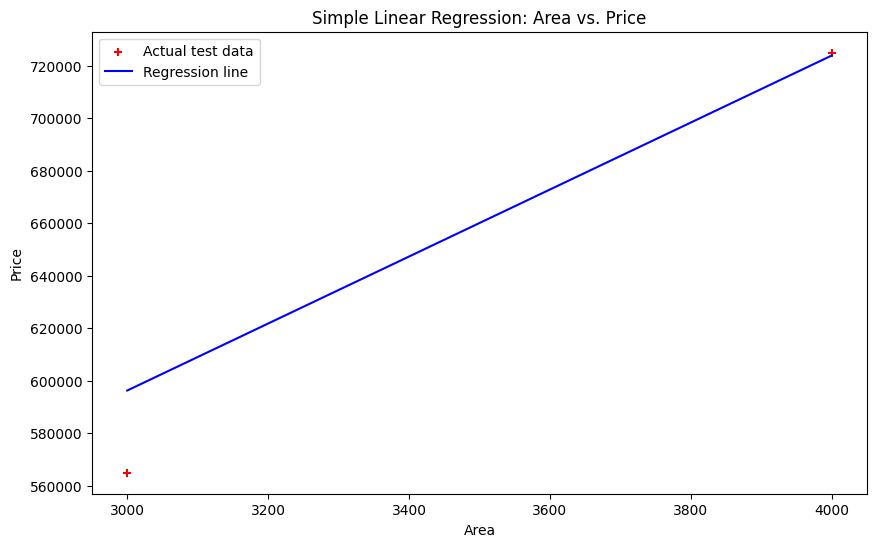

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs. Price')
# plot actual data points from the test set
plt.scatter(x_simple_test.values, y_simple_test.values, color='red', marker='+',
            label='Actual test data')
# plot regression line based on predictions from the test set
plt.plot(x_simple_test.values, y_simple_pred, color='blue', linestyle='-',
         label="Regression line")
plt.legend()
plt.show()




Visualizing Multi variate Regression model

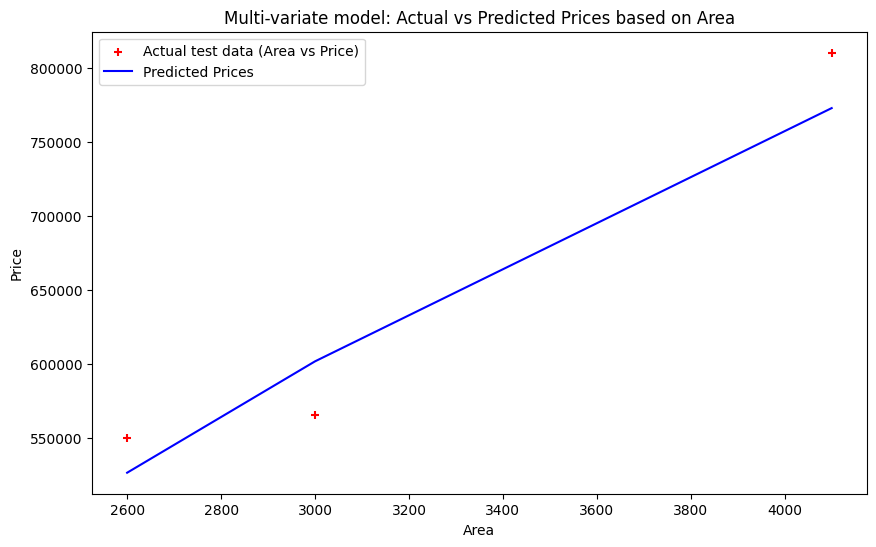

In [ ]:
# plot of 'area' vs 'price' with the overall model's predictions
# sort the test data by 'area' to ensure the blue line looks smooth
x_multi_test_sorted = x_multi_test.sort_values(by='area')
y_multi_test_sorted = y_multi_test[x_multi_test_sorted.index]
# predictions from the full multi variate model
y_multi_pred_sorted = mreg_split.predict(x_multi_test_sorted.values)


plt.figure(figsize=(10,6))
# plot actual data points for 'area' vs 'price' from the test set
plt.scatter(x_multi_test_sorted['area'], y_multi_test_sorted, color='red',
            marker='+', label='Actual test data (Area vs Price)')

# plot the 'regression line'(predictions) against the 'area' feature
# The blue line shows how the model's output changes as 'area' changes while
# also accounting for 'bedrooms' and 'age' in its predictions
plt.plot(x_multi_test_sorted['area'], y_multi_pred_sorted, color='blue',
         linestyle='-', label='Predicted Prices')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Multi-variate model: Actual vs Predicted Prices based on Area')
plt.legend()
plt.show()

